# Exploratory Data Analysis (EDA) for E-commerce Sales

###### Analyze a real e-commerce dataset to identify trends, customer segments, and product performance using Python.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

### Load Dataset

In [3]:
df = pd.read_csv('data[1].csv', encoding='ISO-8859-1')  # some datasets need ISO-8859-1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Cleaning

In [3]:
# Check nulls and missing values
print(df.isnull().sum())

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Check data types
print(df.dtypes)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


### Basic Data Insights

In [4]:
# Shape of dataset
print("Rows:", df.shape[0], "Columns:", df.shape[1])

# Unique customers and products
print("Unique customers:", df['CustomerID'].nunique())
print("Unique products:", df['Description'].nunique())

# Total sales per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

Rows: 406829 Columns: 8
Unique customers: 4372
Unique products: 3896


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Top 10 Products by Sales

C:\Users\harit\AppData\Local\Temp\ipykernel_15612\2043112375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


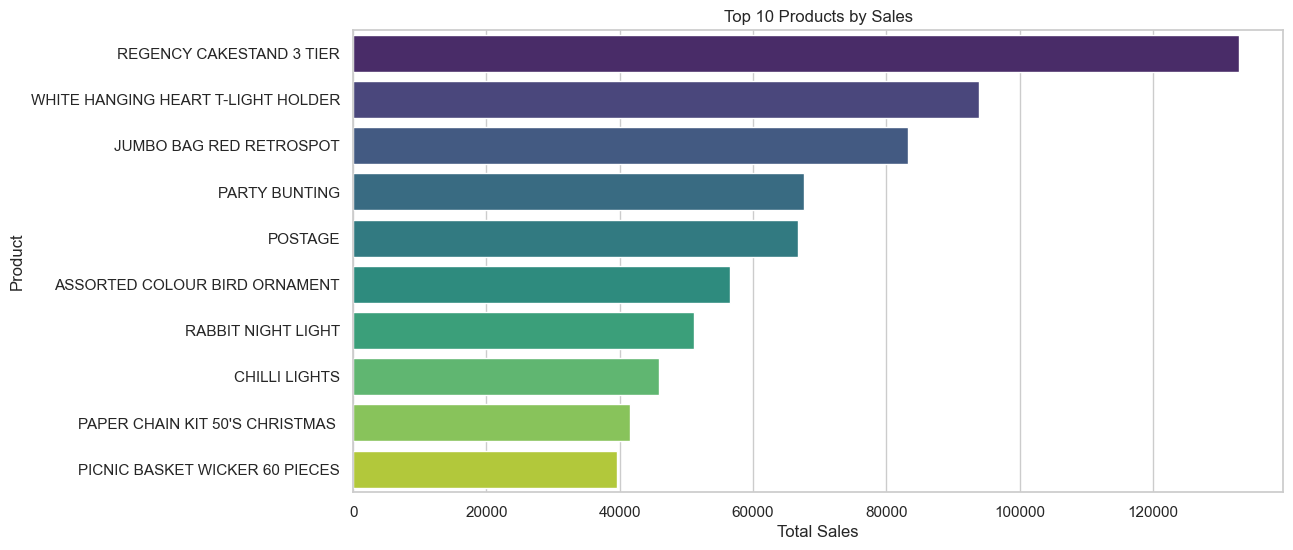

In [5]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

### Top 10 Customers by Purchase

C:\Users\harit\AppData\Local\Temp\ipykernel_15612\1404130129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="magma")


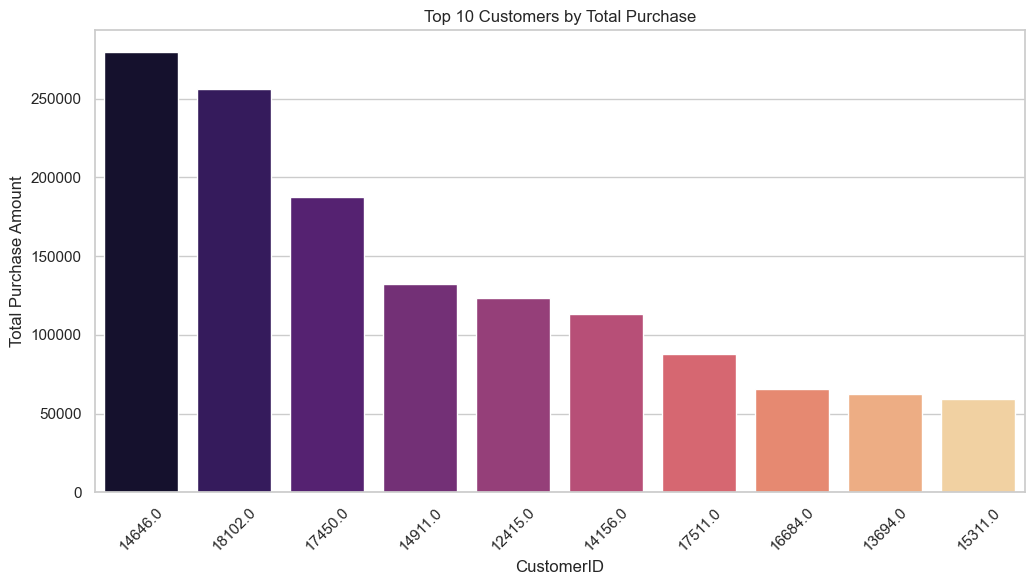

In [6]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="magma")
plt.title("Top 10 Customers by Total Purchase")
plt.xlabel("CustomerID")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=45)
plt.show()

### Sales Trend Over Time

C:\Users\harit\AppData\Local\Temp\ipykernel_15612\1233594011.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['TotalPrice'].resample('M').sum()


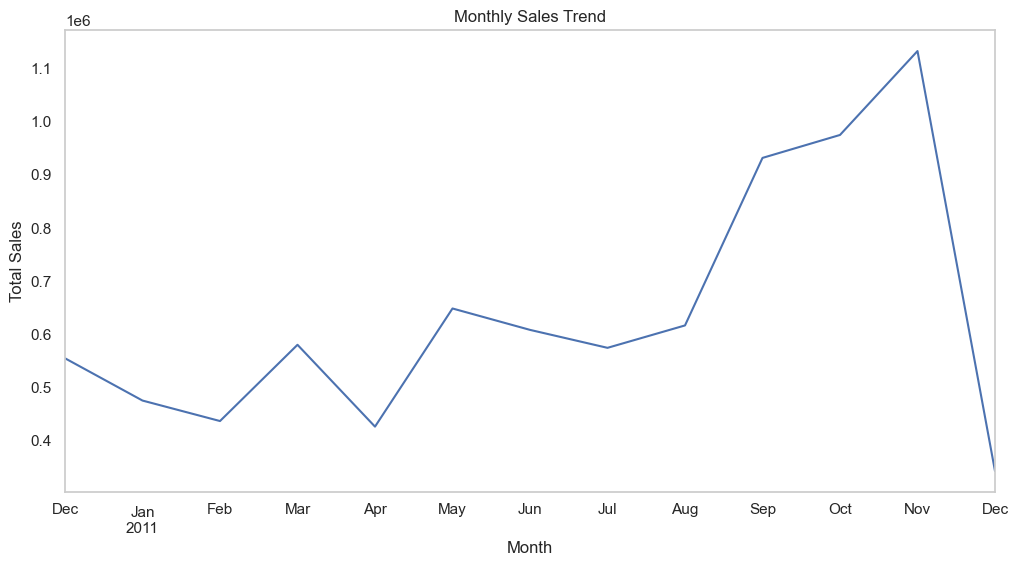

In [7]:
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df['TotalPrice'].resample('M').sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

### Quantity vs Unit Price Scatterplot

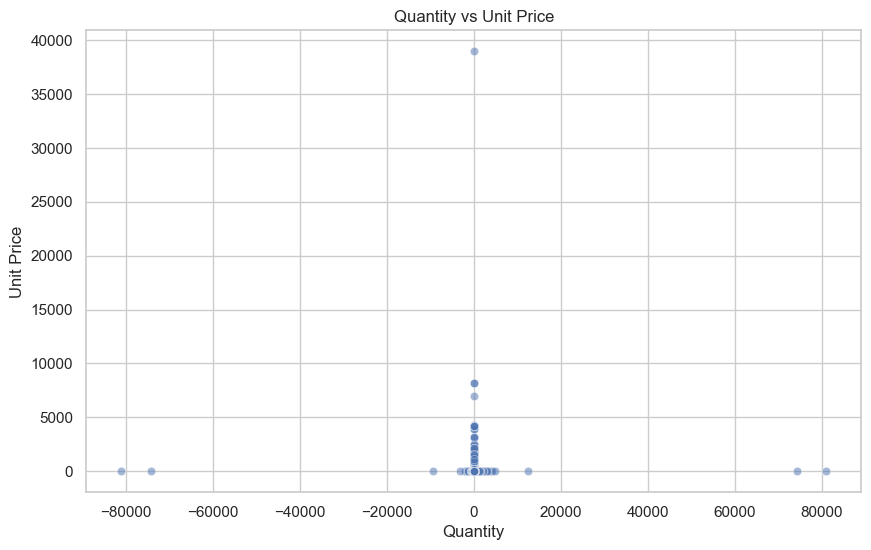

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title("Quantity vs Unit Price")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.show()

### Correlation Heatmap

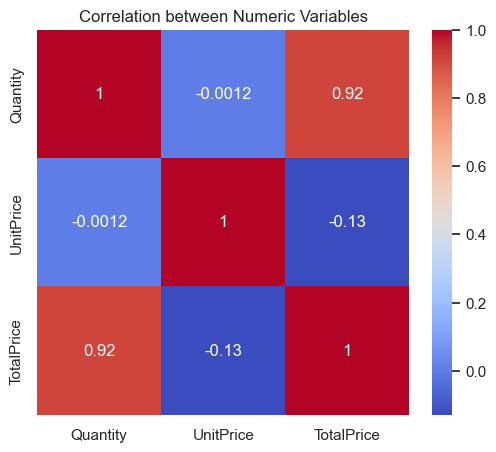

In [9]:
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numeric Variables")
plt.show()

### Insights / Observations

In [10]:
print("📈 Insights:")
print("1️⃣ Top-selling products contribute most of the revenue.")
print("2️⃣ A small number of customers contribute disproportionately to sales.")
print("3️⃣ Sales have seasonal trends (e.g., spikes in holiday months).")
print("4️⃣ High quantity purchases usually have lower unit prices (bulk discounts).")

📈 Insights:
1️⃣ Top-selling products contribute most of the revenue.
2️⃣ A small number of customers contribute disproportionately to sales.
3️⃣ Sales have seasonal trends (e.g., spikes in holiday months).
4️⃣ High quantity purchases usually have lower unit prices (bulk discounts).


### Conclusion 

After performing exploratory data analysis (EDA) on the e-commerce dataset, we observed the following key insights:   
1️⃣ A small number of customers contribute the majority of revenue, highlighting the importance of top customers for business strategy.    
2️⃣ Certain products consistently generate higher sales; these top-selling products should be prioritized in marketing and inventory planning.    
3️⃣ Sales show clear seasonal trends, with spikes during holidays or promotional periods, indicating opportunities for targeted campaigns.    
4️⃣ High quantity purchases often correspond to lower unit prices, suggesting bulk purchasing behavior among some customer segments.    

These insights can guide inventory management, pricing strategies, and customer segmentation, making data-driven decisions more effective for e-commerce growth.

In [4]:
df.to_csv("Cleaned_Superstore.csv", index=False)

In [5]:
import os
os.getcwd()

'C:\\Users\\harit\\Data Analyst Projects'